In [40]:
from fastai.vision.all import *
from fastai.vision.widgets import ImageClassifierCleaner

In [24]:
class DataLoaders(GetAttr):
  def __init__(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train,valid = add_props(lambda i, self: self[i])

In [25]:
headphone = DataBlock(blocks = (ImageBlock, CategoryBlock),
                      get_items = get_image_files,
                      splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
                      get_y = parent_label,
                      item_tfms = Resize(128))

In [26]:
dls = headphone.dataloaders("/content/drive/MyDrive/Colab Notebooks/img_data")

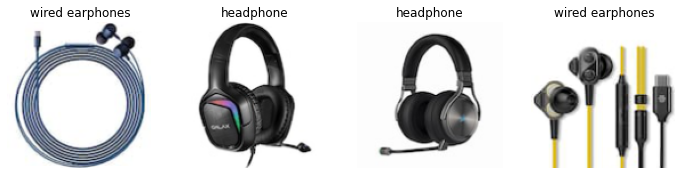

In [27]:
dls.valid.show_batch(max_n = 4, nrows = 1)

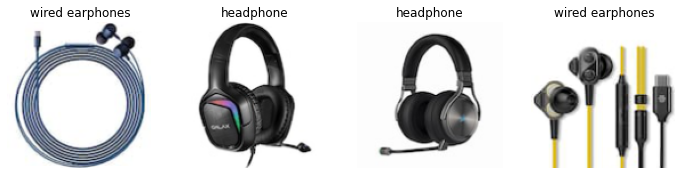

In [29]:
headphone = headphone.new(item_tfms = Resize(128, ResizeMethod.Squish))
dls = headphone.dataloaders("/content/drive/MyDrive/Colab Notebooks/img_data")
dls.valid.show_batch(max_n = 4, nrows = 1)

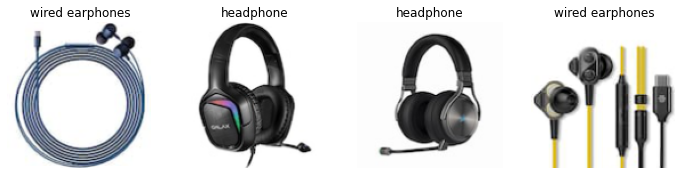

In [30]:
headphone = headphone.new(item_tfms = Resize(128, ResizeMethod.Pad, pad_mode = 'zeros'))
dls = headphone.dataloaders("/content/drive/MyDrive/Colab Notebooks/img_data")
dls.valid.show_batch(max_n = 4, nrows = 1)

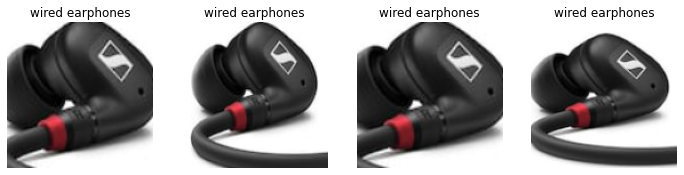

In [31]:
headphone = headphone.new(item_tfms = RandomResizedCrop(128, min_scale = 0.3))
dls = headphone.dataloaders("/content/drive/MyDrive/Colab Notebooks/img_data")
dls.train.show_batch(max_n = 4, nrows = 1, unique = True)

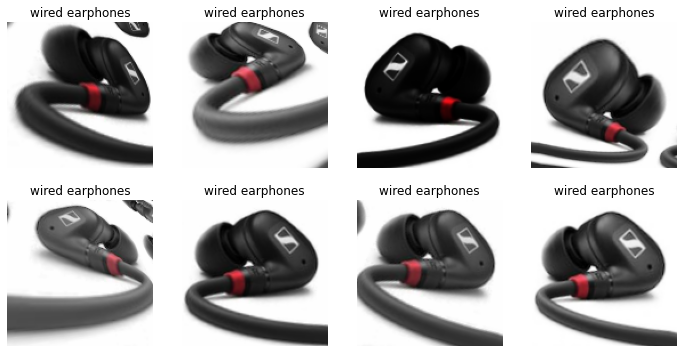

In [32]:
headphone = headphone.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 2))
dls = headphone.dataloaders("/content/drive/MyDrive/Colab Notebooks/img_data")
dls.train.show_batch(max_n = 8, nrows = 2, unique = True)

In [33]:
headphone = headphone.new(item_tfms = RandomResizedCrop(224, min_scale=0.5),
                          batch_tfms = aug_transforms())
dls = headphone.dataloaders("/content/drive/MyDrive/Colab Notebooks/img_data")

In [34]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.047606,0.810475,0.266667,00:41


epoch,train_loss,valid_loss,error_rate,time
0,0.375466,0.243931,0.050000,00:01
1,0.327350,0.137876,0.050000,00:01
2,0.257270,0.118836,0.033333,00:01
3,0.209482,0.143064,0.050000,00:01


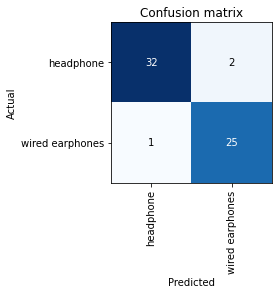

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

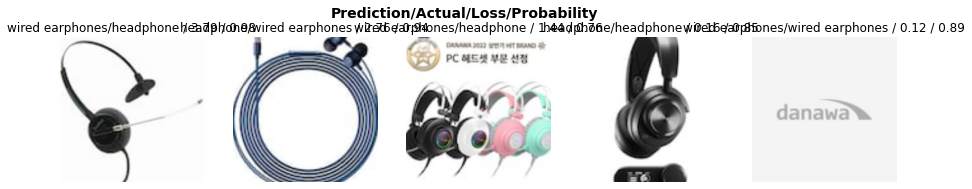

In [36]:
interp.plot_top_losses(5, nrows =1)

In [41]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [42]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [43]:
learn.export()

In [44]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [45]:
learn_inf = load_learner('/content/export.pkl')

In [46]:
learn_inf.predict('/content/drive/MyDrive/Colab Notebooks/화면 캡처 2022-12-07 145819.png')

('headphone', TensorBase(0), TensorBase([1.0000e+00, 8.0160e-07]))

In [47]:
learn_inf.dls.vocab

['headphone', 'wired earphones']